### Importing the needed libraries

In [817]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests as re
import seaborn as sb

### Gathering Data
1. CSV file 'twitter-archive-enhanced.csv'
2. TSV file 'image-predictions.tsv'
3. Twitter API Json file 'tweet_json.txt'

In [818]:
#CSV File
tweet_arch=pd.read_csv('twitter-archive-enhanced.csv')

In [819]:
#TSV File
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = re.get(url)
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [820]:
#Read TSV file
tweet_pred = pd.read_csv('image-predictions.tsv', sep='\t' )

In [821]:
#twitter api
import tweepy as tp
from tweepy import OAuthHandler
import json as js
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tp.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
if consumer_key != 'HIDDEN':
    with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                js.dump(tweet._json, outfile)
                outfile.write('\n')
            except tp.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
else :
    with open('tweet_json.txt') as file:
        tweet_api = pd.read_json(file, lines= True, encoding = 'utf-8')              
end = timer()
#print(end - start)
#print(fails_dict)

### Assessing The Gathered Data
1. Assessing tweet_arch
2. Assessing tweet_pred
3. Assessing tweet_api

#### Assess 1 tweet_arch exploration

In [822]:
tweet_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [823]:
#By running this line multiple time we're able to be choosing random samples each time the problems are being identified.
tweet_arch.sample(50)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2076,670838202509447168,NaN,NaN,2015-11-29 05:34:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pink dogs here. Unreasonably long necks. Left ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670838202...,4,10,None,None,None,None,None
1524,690597161306841088,NaN,NaN,2016-01-22 18:09:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lolo. She's America af. Behind in scie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690597161...,11,10,Lolo,None,None,None,None
735,781163403222056960,NaN,NaN,2016-09-28 16:07:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/781163403...,10,10,None,None,None,None,None
16,888917238123831296,NaN,NaN,2017-07-23 00:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888917238...,12,10,Jim,None,None,None,None
760,778383385161035776,NaN,NaN,2016-09-21 00:00:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nala. She's a future Dogue model. Won'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778383385...,13,10,Nala,None,None,None,None
1615,685268753634967552,NaN,NaN,2016-01-08 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hubertson. He's a Carmel Haberdashery....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685268753...,10,10,Hubertson,None,None,pupper,None
1755,678774928607469569,NaN,NaN,2015-12-21 03:12:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tug. He's not required to wear the con...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678774928...,11,10,Tug,None,None,None,None
1169,720785406564900865,NaN,NaN,2016-04-15 01:26:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He hears everything you say. D...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720785406...,12,10,Archie,None,None,None,None
528,808501579447930884,NaN,NaN,2016-12-13 02:39:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He dug a hole and then sat in it...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808501579...,12,10,Koda,None,None,None,None
2168,669354382627049472,NaN,NaN,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669354382...,8,10,Dug,None,None,None,None


In [824]:
tweet_arch.loc[1747]

tweet_id                                                     679111216690831360
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2015-12-22 01:28:25 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is officially the greatest yawn of all ti...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/679111216...
rating_numerator                                                             12
rating_denominator                                                           10
name                                    

In [825]:
#Update
tweet_arch[tweet_arch.retweeted_status_id.notna() &tweet_arch.retweeted_status_id.duplicated() ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [826]:
tweet_arch[tweet_arch.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [827]:
tweet_arch['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [828]:
(tweet_arch['rating_denominator']==10).all()

False

In [829]:
tweet_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


#### Assess. 2 tweet_pred exploration

In [830]:
tweet_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [831]:
tweet_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [832]:
tweet_pred.sample(25)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1251,747933425676525569,https://pbs.twimg.com/media/CmExV2qWkAAn_pN.jpg,1,Samoyed,0.998201,True,Eskimo_dog,0.000793,True,Great_Pyrenees,0.000296,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1343,759047813560868866,https://pbs.twimg.com/media/Coit84_VYAEMtLi.jpg,1,Labrador_retriever,0.778546,True,bathing_cap,0.154254,False,golden_retriever,0.024972,True
1122,726935089318363137,https://pbs.twimg.com/media/ChaXmuAXEAE66KP.jpg,2,teddy,0.821615,False,toy_poodle,0.083749,True,Lakeland_terrier,0.033318,True
1931,859074603037188101,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,revolver,0.190292,False,projectile,0.149064,False,fountain,0.066047,False
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1762,826204788643753985,https://pbs.twimg.com/media/C3dEza1WcAAhlNU.jpg,2,Labrador_retriever,0.782058,True,golden_retriever,0.156581,True,soft-coated_wheaten_terrier,0.007275,True
1727,820446719150292993,https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg,3,golden_retriever,0.938048,True,kuvasz,0.025119,True,Labrador_retriever,0.022977,True
973,706681918348251136,https://pbs.twimg.com/media/Cc6jcYRXIAAFuox.jpg,1,toy_poodle,0.717584,True,miniature_poodle,0.151433,True,Norwich_terrier,0.047087,True


In [833]:
tweet_pred['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
web_site                      19
Cardigan                      19
Maltese_dog                   18
beagle                        18
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

#### Assess.3 tweet_api exploration

In [834]:
tweet_api.sample(50)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
239,NaN,NaN,2017-03-28 00:07:32,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 846514034648190977, 'id_str'...",48410,False,This is Barney. He's an elder doggo. Hitches a...,NaN,...,0.0,NaN,NaN,NaN,13076,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1198,NaN,NaN,2016-04-03 20:53:33,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1339,False,There has clearly been a mistake. Pup did noth...,NaN,...,0.0,{'created_at': 'Sun Apr 03 14:42:59 +0000 2016...,7.166371e+17,7.166371e+17,475,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1005,NaN,NaN,2016-06-28 01:21:27,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 747600758972026880, 'id_str'...",2545,True,This is Bookstore and Seaweed. Bookstore is ti...,NaN,...,0.0,NaN,NaN,NaN,619,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1098,NaN,NaN,2016-05-26 01:47:51,"[0, 40]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 735648574982246401, 'id_str'...",4397,False,*faints* 12/10 perfection in pupper form https...,NaN,...,0.0,NaN,NaN,NaN,1237,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1861,NaN,NaN,2015-12-11 17:51:04,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675372232026292224, 'id_str'...",1838,False,"The tail alone is 13/10. Great dog, better own...",NaN,...,0.0,NaN,NaN,NaN,563,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2241,NaN,NaN,2015-11-21 03:08:47,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667902444320530432, 'id_str'...",905,False,This is Cleopatricia. She is a northern Paperb...,NaN,...,0.0,NaN,NaN,NaN,396,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1855,NaN,NaN,2015-12-12 03:29:35,"[0, 39]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675517812106919936, 'id_str'...",1414,False,12/10 stay woke https://t.co/XDiQw4Akiw,NaN,...,0.0,NaN,NaN,NaN,507,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1149,NaN,NaN,2016-04-29 00:21:01,"[0, 101]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 725842282449125380, 'id_str'...",7691,False,This is Colby. He's currently regretting all t...,NaN,...,0.0,NaN,NaN,NaN,2970,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
666,NaN,NaN,2016-10-23 23:42:19,"[0, 72]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 790337582504763392, 'id_str'...",8740,False,Meet Maggie. She can hear your cells divide. 1...,NaN,...,0.0,NaN,NaN,NaN,2167,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
472,NaN,NaN,2017-01-03 17:33:39,"[0, 86]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 816336726218117120, 'id_str'...",9564,False,This is Dudley. He found a flower and now he's...,NaN,...,0.0,NaN,NaN,NaN,2269,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [835]:
tweet_api.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [836]:
tweet_api['retweeted_status'][31]

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'display_text_range': [0, 11],
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': "Oakland A's 🌳🐘⚾️",
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the four-time World Series champion Oakland Athletic

In [837]:
print(tweet_api.id.head(3))
print(tweet_arch.tweet_id.head(3))
print(tweet_pred.tweet_id.head(3))

0    892420643555336193
1    892177421306343426
2    891815181378084864
Name: id, dtype: int64
0    892420643555336193
1    892177421306343426
2    891815181378084864
Name: tweet_id, dtype: int64
0    666020888022790149
1    666029285002620928
2    666033412701032449
Name: tweet_id, dtype: int64


In [838]:
tweet_api.retweet_count.describe()

count     2354.000000
mean      3164.797366
std       5284.770364
min          0.000000
25%        624.500000
50%       1473.500000
75%       3652.000000
max      79515.000000
Name: retweet_count, dtype: float64

# Observations
### Quality Issues
1. Dataset 1 tweet_arch
    0. Drop the rows with retweeted_status_id values before dropping the whole column in next steps (UPDATE)
    1. The timestamp column should be datetime format.
    2. The dog (name,doggo,floofer,pupper,puppo) columns have Nones instead of NaNs.
    3. The source html format in source column since the source can be extracted.
    4. "A Retweet is a re-posting of a Tweet.". So its columns such as retweet_status_id etc can be dropped.
    5. In reply is also to be dropped.
    6. The name column in 1747 index is 'officially' which doesn't match.
    7. Some of the numerator ratings inside text columns are in decimal @index 45.
    8. The text column is including the rating and the review with respect to the link. 
    9. Sometimes denominator ratings are not out of 10.
    10. The NaNs in expanded urls. Since expanded urls = tweet URLs which is essential.
    11. Some dogs are classified into multiple stage.
    12. Drop the tweets that are NaNs.
    13. Remove all of the '.*only rate dogs' of the tweet column as shown in index 25.
2. Dataset 2 tweet_pred
    1. Drop the img_num as for example each img_num category have different links and are showing different results.
    2. Combining p1,p2,p3 and p1_conf,p2_conf,p3_conf ,p1_dog,p2_dog,p3_dog into 2 columns only (dog name & probability)
    3. Drop p1,....p3_dog and drop the NaN if all of the p (p1,p2,p3) are false.
3. Dataset 3 tweet_api Explored Visually & Programatically
    1. Problem in naming the id column should match the other 2 dataset should be tweet_id instead of id.
    2. Any column except tweet_id, favourite_count, retweeted_count can be dropped.

### Tidiness Issues
1. Dataset 1 tweet_arch 
    1. Combining columns (doggo,floofer,pupper,puppo) as they're categories and for efficiency purposes, Drop doggo,...puppo.
2. Combining the whole datasets
   1. Combining the combined (archive-prediction) with the api into 1 dataset (Master).
    

# Cleaning Phase I (Quality Issues)

In [839]:
arch_clean=tweet_arch.copy()
pred_clean=tweet_pred.copy()
api_clean=tweet_api.copy()

#### Define 1.0 Drop the rows with retweeted_status_id values before dropping the whole column in next steps (UPDATE)

#### Code

In [840]:
tmp=arch_clean.copy()
tmp.shape

(2356, 17)

In [841]:
tmp=tmp[tmp.retweeted_status_id.isnull()]
tmp.shape

(2175, 17)

#### Test

In [842]:
assert tmp.retweeted_status_id.isnull().all()==True

In [843]:
arch_clean=tmp.copy()

#### Define 1.A Time stamp to be convered to datetime format.

#### Code

In [844]:
arch_clean['timestamp']=pd.to_datetime(arch_clean['timestamp'])

#### Test

In [845]:
assert (arch_clean['timestamp'].dtype != 'O')

#### Define 1.B The dog (name,doggo,floofer,pupper,puppo) columns  should have NaNs instead of Nones.

#### Code

In [846]:
cols='name,doggo,floofer,pupper,puppo'.split(',')
arch_clean[cols]=arch_clean[cols].replace('None',np.nan,regex=False)


#### Test

In [847]:
arch_clean[cols].isnull().sum()


name        680
doggo      2088
floofer    2165
pupper     1941
puppo      2150
dtype: int64

#### Define 1.C The source html format in source column since the source can be extracted.

#### Code

In [848]:
tmp=arch_clean.copy()
tmp['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [849]:
tmp.source.unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [850]:
tmp['source']=tmp['source'].apply(lambda st: st[st.find('">')+2:st.find('</')]).astype('category')

#### Test

In [851]:
arch_clean['source']=tmp['source']
arch_clean['source'].unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

#### Define
    1.D "A Retweet is a re-posting of a Tweet.". So its columns can be dropped since it's not the interest.
    1.E In reply columns are also to be dropped.

#### Code

In [852]:
tmp.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [853]:
cols=['retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id']
tmp.drop(columns=cols,inplace=True)

#### Test

In [854]:
arch_clean=tmp.copy()
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1495 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 206.2+ KB


#### Define 1.F The name column@index 1747 is 'officially' which doesn't match & visually explorations shows there's many invalids.

#### Code

In [855]:
tmp.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey

In [856]:
len(tmp.name.unique())

956

In [857]:
len(tmp[~tmp.name.isna()].name.unique())

955

In [858]:
trash=tmp[~(tmp.name.isna()|tmp.name.str.istitle())].name.unique()
trash

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'BeBe', 'very',
       'DonDon', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'CeCe', 'the',
       'by', 'officially', 'life', 'light', 'space', 'JD', 'DayZ'], dtype=object)

In [859]:
for i in trash:
    tmp.ix[tmp.name==i,'name']=np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


#### Test

In [860]:
tmp[~(tmp.name.isna()|tmp.name.str.istitle())].name.unique()

array([], dtype=object)

In [861]:
arch_clean=tmp.copy()
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1385 non-null object
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 206.2+ KB


#### Define 1.G Some of the text column has numerator ratings that are in decimal @index 45.

#### Code

In [862]:
tmp['text'][45]

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [863]:
tmp['rating_numerator'][45]

5

In [864]:
tmp.iloc[45,3:6:2]

text                This is Rusty. He wasn't ready for the first p...
rating_numerator                                                   13
Name: 48, dtype: object

In [865]:
tmp[tmp.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,0
45,13.5
695,9.75
763,11.27
1689,9.5
1712,11.26


In [866]:
#twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]
tmp[tmp.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1689,I've been told there's a slight possibility he...,5
1712,Here we have uncovered an entire battalion of ...,26


In [867]:
mod_ratings=tmp[tmp.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [868]:
tmp.loc[mod_ratings.index, 'rating_numerator'] = mod_ratings.values



In [869]:
tmp.rating_numerator = tmp.rating_numerator.astype('float')

#### Test

In [870]:
tmp.loc[mod_ratings.index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN,NaN,NaN,NaN
695,786709082849828864,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,2015-12-28 05:07:27,Twitter for iPhone,I've been told there's a slight possibility he...,NaN,9.50,10,NaN,NaN,NaN,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,NaN,NaN,NaN,NaN


In [871]:
arch_clean=tmp.copy()

#### Define 1.H The text column is including the rating and the review with respect to the link. We should extract the review.

#### Code

In [872]:
tmp.text.str.extract('(.+(?=\s\d+/\d+\s))').head(3)

,0
0,This is Phineas. He's a mystical boy. Only eve...
1,This is Tilly. She's just checking pup on you....
2,This is Archie. He is a rare Norwegian Pouncin...


In [873]:
tmp.text.str.extract('(.+(?=\s\d+/\d+\s))')[0][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut."

In [874]:
tmp.text=tmp.text.str.extract('(.+(?=\s\d+/\d+\s))')

#### Test

In [875]:
tmp.text.sample(25)

1985    This is Cheryl AKA Queen Pupper of the Skies. ...
126     Say hello to Cooper. His expression is the sam...
1328    This is Lucy. She's a Venetian Kerploof. Suppo...
718     This is Finn. He likes eavesdropping from fili...
2129    This is Sandra. She's going skydiving. Nice ad...
532     This is Cooper. He likes to stick his tongue o...
1230    Here we see an extremely rare Bearded Floofmal...
50      This is Stanley. He has his first swim lesson ...
2265    This is Frank (pronounced "Fronq"). Too many b...
57      Meet Elliot. He's a Canadian Forrest Pup. Unus...
547     This is Zeke the Wonder Dog. He never let that...
2007    This is Kreg. He has the eyes of a tyrannical ...
790     This is Heinrich (pronounced "Pat"). He's a Bo...
1744                 This is Rubio. He has too much skin.
207     This is Jarod. He likes having his belly brush...
928     This is Keith. He's pursuing a more 2D lifesty...
1088    This is Remy. He has some long ass ears (proba...
619     This i

In [876]:
tmp.text[30]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy'

In [877]:
arch_clean=tmp.copy()

#### Define 1.I Sometimes denominator ratings are not out of 10. They can be dropped.

In [878]:
tmp[tmp['rating_denominator'] !=10].sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7,Sam,NaN,NaN,NaN,NaN
1779,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of,https://twitter.com/dog_rates/status/677716515...,144.0,120,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57,Twitter for iPhone,Why does this never happen at my front door...,https://twitter.com/dog_rates/status/758467244...,165.0,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,2016-06-08 02:41:38,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9.0,11,NaN,NaN,NaN,NaN,NaN
1274,709198395643068416,2016-03-14 02:04:08,Twitter for iPhone,None know where camera is.,https://twitter.com/dog_rates/status/709198395...,45.0,50,NaN,NaN,NaN,NaN,NaN
1635,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,121.0,110,NaN,NaN,NaN,NaN,NaN
1351,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers.,https://twitter.com/dog_rates/status/704054845...,60.0,50,NaN,NaN,NaN,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47,Twitter for iPhone,Happy 4/20 from the squad!,https://twitter.com/dog_rates/status/722974582...,4.0,20,NaN,NaN,NaN,NaN,NaN
2335,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1.0,2,NaN,NaN,NaN,NaN,NaN
1433,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups.,https://twitter.com/dog_rates/status/697463031...,44.0,40,NaN,NaN,NaN,NaN,NaN


#### Code

In [879]:
tmp=tmp[tmp['rating_denominator'] == 10]

#### Test

In [880]:
tmp[['rating_numerator','rating_denominator']].sample(25)

,rating_numerator,rating_denominator
1725,9.0,10
1623,11.0,10
1125,6.0,10
126,12.0,10
2231,10.0,10
1312,11.0,10
2218,10.0,10
349,13.0,10
1857,12.0,10
1368,12.0,10


In [881]:
arch_clean=tmp.copy()
arch_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.153000e+03,2153.000000,2153.0
mean,7.372472e+17,12.212392,10.0
std,6.761351e+16,42.655268,0.0
min,6.660209e+17,0.000000,10.0
25%,6.767764e+17,10.000000,10.0
50%,7.098528e+17,11.000000,10.0
75%,7.895992e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


#### Define 1.J The NaNs in expanded urls. Since expanded urls = tweet URLs which is essential. Their rows can be dropped.

#### Code

In [882]:
tmp = tmp.loc[~tmp.expanded_urls.isnull()]

#### Test

In [883]:
tmp.expanded_urls.sample(15)

980     https://twitter.com/dog_rates/status/749774190...
2144    https://twitter.com/dog_rates/status/669942763...
1546    https://twitter.com/dog_rates/status/689283819...
1580    https://twitter.com/dog_rates/status/687127927...
1269    https://twitter.com/dog_rates/status/709519240...
1475    https://twitter.com/dog_rates/status/693642232...
1280    https://twitter.com/dog_rates/status/708834316...
1056    https://twitter.com/dog_rates/status/742161199...
70      https://twitter.com/dog_rates/status/879008229...
1790    https://twitter.com/dog_rates/status/677530072...
48      https://twitter.com/dog_rates/status/882992080...
2009    https://twitter.com/dog_rates/status/672254177...
205     https://www.gofundme.com/bennys-medical-bills,...
127     https://twitter.com/dog_rates/status/867900495...
304     https://twitter.com/dog_rates/status/836380477...
Name: expanded_urls, dtype: object

In [884]:
arch_clean=tmp.copy()

In [885]:
arch_clean.expanded_urls.sample(25)

1170    https://twitter.com/dog_rates/status/720775346...
889     https://twitter.com/dog_rates/status/759793422...
1151    https://twitter.com/dog_rates/status/725842289...
2111    https://twitter.com/dog_rates/status/670442337...
989     https://twitter.com/dog_rates/status/748932637...
1374    https://twitter.com/dog_rates/status/701952816...
287     https://twitter.com/dog_rates/status/838561493...
93      https://twitter.com/dog_rates/status/874057562...
1130    https://twitter.com/dog_rates/status/729113531...
1692    https://twitter.com/dog_rates/status/681302363...
1745    https://twitter.com/dog_rates/status/679148763...
2279    https://twitter.com/dog_rates/status/667405339...
1861    https://twitter.com/dog_rates/status/675483430...
1209    https://twitter.com/dog_rates/status/715696743...
110     https://twitter.com/animalcog/status/871075758...
2250    https://twitter.com/dog_rates/status/667832474...
1723    https://twitter.com/dog_rates/status/680100725...
215     https:

#### Define 1.K Some dogs are classified into multiple stage.

In [886]:
print(len(tmp[(tmp.doggo.notnull()) & (tmp.floofer.notnull())]))
print(len(tmp[(tmp.doggo.notnull()) & (tmp.puppo.notnull())]))
print(len(tmp[(tmp.doggo.notnull()) & (tmp.pupper.notnull())]))
print(len(tmp[(tmp.floofer.notnull()) & (tmp.pupper.notnull())]))
print(len(tmp[(tmp.puppo.notnull()) & (tmp.pupper.notnull())]))
print(len(tmp[(tmp.puppo.notnull()) & (tmp.floofer.notnull())]))

1
1
10
0
0
0


#### Code

In [887]:
for i, row in tmp[((tmp.doggo.notnull()) & (tmp.floofer.notnull()))
                   | ((tmp.doggo.notnull()) & (tmp.puppo.notnull())) |\
                 (((tmp.doggo.notnull()) & (tmp.pupper.notnull())))].iterrows():
    print('%s %s\n'%(row.tweet_id, row.text))

855851453814013952 Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda.

854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two.

817777686764523521 This is Dido. She's playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."

808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both

802265048156610565 Like doggo, like pupper version 2. Both

801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size.

785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still

781308096455073793 Pupper butt 1, Doggo 0. Both

759793422261743616 Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both

751583847268179968 Please stop sending it pictur

In [888]:
#Based on the observation in the above cell it can be seen that it's clearly a puppo and floofer respectively
tmp['doggo'][tmp.tweet_id.isin([855851453814013952, 854010172552949760])] = np.nan

In [889]:
#There's observation 'Please stop sending it pictures that don't even have a doggo or pupper' in them 751583847268179968 
tmp['doggo'][tmp.tweet_id.isin([751583847268179968])] = np.nan
tmp['pupper'][tmp.tweet_id.isin([751583847268179968])] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [890]:
#in 781308096455073793 it is clearly a pupper 'Pupper butt 1, Doggo 0. Both'
tmp['doggo'][tmp.tweet_id.isin([781308096455073793])] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [891]:
#785639753186217984 check
#This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still
tmp.loc[tmp.tweet_id==785639753186217984]


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,NaN,pupper,NaN


In [892]:
#It's clear that Pinot is a doggo since he is saying that he's also pointier than your average pupper still.
#785639753186217984
tmp['pupper'][tmp.tweet_id.isin([785639753186217984])] = np.nan

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [893]:
tmp['dog_stat']=tmp.doggo.replace(np.nan, '')+tmp.floofer.replace(np.nan, '')+tmp.pupper.replace(np.nan, '')+\
tmp.puppo.replace(np.nan, '')

In [894]:
tmp.dog_stat.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggopupper'], dtype=object)

In [895]:
len(tmp[(tmp.doggo.notnull()) & (tmp.pupper.notnull())])

7

In [896]:
tmp.loc[tmp.dog_stat == 'doggopupper', 'dog_stat'] = 'doggo, pupper'

In [897]:
tmp['dog_stat'].replace('',np.nan,inplace=True)

#### Test

In [898]:
print(len(tmp[(tmp.doggo.notnull()) & (tmp.floofer.notnull())]))
print(len(tmp[(tmp.doggo.notnull()) & (tmp.puppo.notnull())]))
print(len(tmp[(tmp.doggo.notnull()) & (tmp.pupper.notnull())]))

0
0
7


In [899]:
#There's 9 tweets having both doggo and pupper.
tmp.dog_stat.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, pupper'], dtype=object)

In [900]:
arch_clean=tmp.copy()

#### Define 1.L Drop the tweets that are NaN.

#### Code

In [901]:
arch_clean.shape

(2099, 13)

In [902]:
arch_clean = arch_clean[~arch_clean.text.isnull()]
arch_clean.shape

(2028, 13)

In [903]:
#optional
tmp=arch_clean.copy()

#### Test

In [904]:
assert (tmp.text.isnull().all() == False)  

#### Define 1.M Remove all of the '.*only rate dogs' tweets.

#### Code

In [905]:
tmp.loc[tmp.text.str.match('.*only rate dogs')]['text'][25]

'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you...'

In [906]:
tmp.loc[tmp.text.str.match('.*only rate dogs')]['text'].sample(5)

246     C'mon guys. Please only send in dogs. We only ...
390     We only rate dogs. Please don't send in any mo...
801     Guys this is getting so out of hand. We only r...
1207    This is a taco. We only rate dogs. Please only...
1097    We only rate dogs. Please stop sending in non-...
Name: text, dtype: object

In [907]:
tmp.loc[tmp.text.str.match('.*only rate dogs')]['text'][1207]

'This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you...'

In [908]:
tmp.loc[~tmp.text.str.match('.*only rate dogs')].shape

(1978, 13)

In [909]:
tmp=tmp.loc[~tmp.text.str.match('.*only rate dogs')]

#### Test

In [910]:
assert (tmp.text.str.match('.*only rate dogs').isnull().all() !=True)

In [911]:
arch_clean=tmp.copy()

#### Define 2.A Drop the img_num as for example each img_num category have different links and are showing different results.

#### Code

In [912]:
tmp2=pred_clean.copy()

In [913]:
tmp2.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1951,863432100342583297,https://pbs.twimg.com/media/C_uG6eAUAAAvMvR.jpg,1,Staffordshire_bullterrier,0.690517,True,French_bulldog,0.103360,True,beagle,0.079489,True
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False
249,670679630144274432,https://pbs.twimg.com/media/CU67jGSUkAAk_1Y.jpg,1,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True
631,680940246314430465,https://pbs.twimg.com/media/CXMvio7WQAAPZJj.jpg,1,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
1037,711998809858043904,https://pbs.twimg.com/tweet_video_thumb/CeGGkW...,1,comic_book,0.105171,False,kuvasz,0.059895,True,book_jacket,0.046638,False


In [914]:
tmp2.drop(columns='img_num',inplace=True)

#### Test

In [915]:
assert 'img_num' not in tmp2.columns

In [916]:
tmp2.sample(3)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
34,666435652385423360,https://pbs.twimg.com/media/CT-nsTQWEAEkyDn.jpg,Chesapeake_Bay_retriever,0.184130,True,chain_saw,0.056775,False,power_drill,0.036763,False
1677,813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,golden_retriever,0.888181,True,Labrador_retriever,0.042312,True,Saluki,0.009702,True
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,pug,0.407117,True,muzzle,0.165638,False,kuvasz,0.045837,True


In [917]:
pred_clean=tmp2.copy()

#### Define 3.A Problem in naming the id column should match the other 2 dataset should be tweet_id instead of id.


In [918]:
tmp3=api_clean.copy()

In [919]:
tmp3.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

#### Code

In [920]:
tmp3.rename(columns={'id':'tweet_id'},inplace=True)

#### Test

In [921]:
assert (('id' not in tmp3.columns)&('tweet_id' in tmp3.columns))== True

In [922]:
api_clean=tmp3.copy()

In [923]:
assert (('id' not in api_clean.columns)&('tweet_id' in api_clean.columns))== True

#### Define 3.B Any column except 'tweet_id','retweet_count','favorite_count' can be dropped

#### Code

In [924]:
tmp3.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'tweet_id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [925]:
tmp3[['tweet_id','retweet_count','favorite_count']].head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


In [926]:
tmp3=tmp3[['tweet_id','retweet_count','favorite_count']]

#### Test

In [927]:
tmp3.sample(5)

,tweet_id,retweet_count,favorite_count
359,829861396166877184,2243,13441
696,786595970293370880,3601,10497
1271,709207347839836162,6567,13755
2281,667200525029539841,282,658
2264,667530908589760512,264,501


In [928]:
api_clean=tmp3.copy()

In [929]:
assert  (api_clean.columns == ['tweet_id','retweet_count','favorite_count']).all()

# Cleaning Phase II (Tidiness Issues)

#### Define 1. Dataset 1  Drop the (doggo,floofer,pupper,puppo) since we already combined them in 1.K Quality Issue .

#### Code

In [930]:
tmp.drop(columns=['doggo','floofer','pupper','puppo'],inplace=True)

#### Test

In [931]:
tmp.dog_stat.value_counts()

pupper           218
doggo             72
puppo             23
floofer           10
doggo, pupper      7
Name: dog_stat, dtype: int64

In [932]:
arch_clean=tmp.copy()

In [933]:
arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1978 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1978 non-null int64
timestamp             1978 non-null datetime64[ns]
source                1978 non-null category
text                  1978 non-null object
expanded_urls         1978 non-null object
rating_numerator      1978 non-null float64
rating_denominator    1978 non-null int64
name                  1357 non-null object
dog_stat              330 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 141.2+ KB


### The next one is a quality issue not tidiness. Define 2.B and 2.C in QUALITY ISSUES 
#### Dataset 2 Combining p1,p2,p3 and p1_conf,p2_conf,p3_conf and p1_dog,p2_dog,p3_dog into (dog name & probability) 

#### Code

In [934]:
tmp2.columns

Index(['tweet_id', 'jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [935]:
tmp2.sample(5)

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
176,669203728096960512,https://pbs.twimg.com/media/CUl9PGBVEAUV3Wz.jpg,pug,0.910452,True,French_bulldog,0.055090,True,Chihuahua,0.014897,True
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True
1030,711306686208872448,https://pbs.twimg.com/media/Cd8Rpl0W0AAN1kU.jpg,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True
807,692017291282812928,https://pbs.twimg.com/media/CZqKDZTVIAEvtbc.jpg,Tibetan_terrier,0.247565,True,cocker_spaniel,0.121377,True,bow_tie,0.099363,False
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True


In [936]:
((tmp2['p1_dog']==False) &(tmp2['p2_dog']==False) & (tmp2['p3_dog']==False)).value_counts()

False    1751
True      324
dtype: int64

In [937]:
tmp2.describe()

,tweet_id,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,1.000000,4.880140e-01,2.734190e-01


In [938]:
tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


In [939]:
(tmp2['p1_conf']>tmp2['p2_conf']).value_counts()

True    2075
dtype: int64

In [940]:
(tmp2['p2_conf']>tmp2['p3_conf']).value_counts()

True    2075
dtype: int64

In [941]:
#Based on the above 2 lines it can be seen that p1_conf>p2_conf>p3_conf
dog_pred = []
dog_prob = []
for index, row in tmp2.iterrows():
    if (row['p1_dog']) == True:
        dog_pred.append(row['p1'])
        dog_prob.append(row['p1_conf'])
    elif ((row['p1_dog']==False) and row['p2_dog'])==True:
        dog_pred.append(row['p2'])
        dog_prob.append(row['p2_conf'])
    elif ((row['p1_dog']==False) and (row['p2_dog']==False) and row['p3_dog'])==True:
        dog_pred.append(row['p3'])
        dog_prob.append(row['p3_conf'])
        
    #All are false    
    else: 
        dog_pred.append(np.nan)
        dog_prob.append(np.nan)
        
        
tmp2['dog_pred'] = dog_pred
tmp2['dog_prob'] = dog_prob


#### Test

In [942]:
tmp2[['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog','dog_pred','dog_prob']].sample(25)

,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_pred,dog_prob
1274,Labrador_retriever,0.252031,True,Maltese_dog,0.188090,True,golden_retriever,0.133017,True,Labrador_retriever,0.252031
336,beagle,0.958178,True,basset,0.009117,True,Italian_greyhound,0.007731,True,beagle,0.958178
1636,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True,Cardigan,0.593858
1228,Labrador_retriever,0.663800,True,golden_retriever,0.308261,True,ice_bear,0.004269,False,Labrador_retriever,0.663800
1123,flat-coated_retriever,0.656463,True,Great_Dane,0.084766,True,Labrador_retriever,0.058909,True,flat-coated_retriever,0.656463
644,Rottweiler,0.760671,True,Labrador_retriever,0.096585,True,Staffordshire_bullterrier,0.040333,True,Rottweiler,0.760671
30,toy_terrier,0.149680,True,papillon,0.148258,True,Chihuahua,0.142860,True,toy_terrier,0.149680
875,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True,Labrador_retriever,0.643690
1929,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True,Pembroke,0.987407
1304,chow,0.194773,True,monitor,0.102305,False,Siberian_husky,0.086855,True,chow,0.194773


In [943]:
tmp2=tmp2.drop(columns=['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog'])
tmp2=tmp2[tmp2['dog_pred'].notnull()&tmp2['dog_prob'].notnull()]

In [944]:
pred_clean=tmp2.copy()

In [945]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id    1751 non-null int64
jpg_url     1751 non-null object
dog_pred    1751 non-null object
dog_prob    1751 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 68.4+ KB


In [946]:
pred_clean.sample(25)

,tweet_id,jpg_url,dog_pred,dog_prob
586,679047485189439488,https://pbs.twimg.com/media/CWx2FaLWcAEQ3vh.jpg,golden_retriever,0.002930
1713,818614493328580609,https://pbs.twimg.com/media/C1xNgraVIAA3EVb.jpg,Chihuahua,0.450722
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,collie,0.992732
1002,708810915978854401,https://pbs.twimg.com/media/CdYzwuYUIAAHPkB.jpg,golden_retriever,0.976139
2038,884876753390489601,https://pbs.twimg.com/media/DEe2tZXXkAAwyX3.jpg,chow,0.822103
500,675845657354215424,https://pbs.twimg.com/media/CWEWClfW4AAnqhG.jpg,pug,0.883952
1167,735648611367784448,https://pbs.twimg.com/media/CjWMezdW0AErwU3.jpg,Pembroke,0.462594
394,673612854080196609,https://pbs.twimg.com/media/CVknUTlVEAARjU5.jpg,Newfoundland,0.223101
486,675497103322386432,https://pbs.twimg.com/media/CV_ZAhcUkAUeKtZ.jpg,vizsla,0.519589
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,golden_retriever,0.636845


#### Define 3 Combining all of the datasets. 

In [947]:
df = pd.merge(arch_clean, pred_clean, on='tweet_id')
df = pd.merge(df, api_clean, on = 'tweet_id')


In [948]:
df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stat,jpg_url,dog_pred,dog_prob,retweet_count,favorite_count
1481,667915453470232577,2015-11-21 04:00:28,Twitter for iPhone,Meet Otis. He is a Peruvian Quartzite. Pic spo...,https://twitter.com/dog_rates/status/667915453...,10.0,10,Otis,NaN,https://pbs.twimg.com/media/CUTpj-GWcAATc6A.jpg,boxer,0.196655,59,222
676,737826014890496000,2016-06-01 02:00:04,Twitter for iPhone,This is Remy. He has some long ass ears (proba...,https://twitter.com/dog_rates/status/737826014...,10.0,10,Remy,NaN,https://pbs.twimg.com/media/Cj1I1fbWYAAOwff.jpg,vizsla,0.990391,2006,5757
381,793845145112371200,2016-11-02 16:00:06,Twitter for iPhone,This is Clark. He was just caught wearing pants.,https://twitter.com/dog_rates/status/793845145...,13.0,10,Clark,NaN,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,Old_English_sheepdog,0.765277,2187,10295
933,696886256886657024,2016-02-09 02:40:05,Twitter for iPhone,Guys I found the dog from Up.,https://twitter.com/dog_rates/status/696886256...,12.0,10,NaN,NaN,https://pbs.twimg.com/media/CavWWdFWAAArflW.jpg,kuvasz,0.383941,2016,5317
60,876484053909872640,2017-06-18 16:57:37,Twitter for iPhone,This is Benedict. He wants to thank you for th...,https://twitter.com/dog_rates/status/876484053...,13.0,10,Benedict,NaN,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,golden_retriever,0.874566,2511,19163


# <u> Master Dataframe </u>

In [949]:
df.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

# <u>Visualization</u> 

In [950]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1563 entries, 0 to 1562
Data columns (total 14 columns):
tweet_id              1563 non-null int64
timestamp             1563 non-null datetime64[ns]
source                1563 non-null category
text                  1563 non-null object
expanded_urls         1563 non-null object
rating_numerator      1563 non-null float64
rating_denominator    1563 non-null int64
name                  1155 non-null object
dog_stat              254 non-null object
jpg_url               1563 non-null object
dog_pred              1563 non-null object
dog_prob              1563 non-null float64
retweet_count         1563 non-null int64
favorite_count        1563 non-null int64
dtypes: category(1), datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 172.7+ KB


In [951]:
temp=df.groupby('dog_pred').mean().sort_values('retweet_count',ascending=False)['retweet_count'].head()
temp

dog_pred
Bedlington_terrier    8740.200000
standard_poodle       7269.375000
Afghan_hound          5976.000000
French_bulldog        5402.035714
English_springer      5401.600000
Name: retweet_count, dtype: float64

In [952]:
temp.index=['Standard Poodle','Bedlington Terrier','Afghan Hound','Cocker Spaniel','French Bulldog']

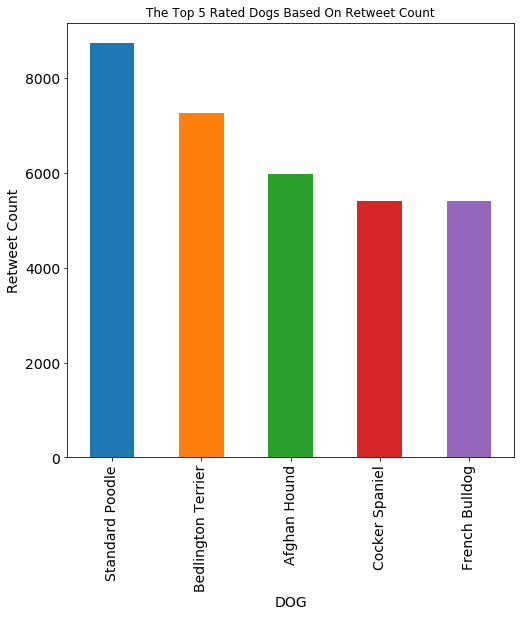

In [953]:
temp.plot(kind="bar",title="The Top 5 Rated Dogs Based On Retweet Count",figsize=(8,8),fontsize=14)
#plt.legend(["Retweet Count"],["Hi"],loc='best')
plt.xlabel("DOG",fontsize=14)
plt.ylabel("Retweet Count",fontsize=14)
plt.show()

In [954]:
temp=df.groupby('dog_pred').mean().sort_values('favorite_count',ascending=False)['favorite_count'].head()
temp

dog_pred
Bedlington_terrier      24438.400000
Saluki                  24060.000000
French_bulldog          19612.928571
standard_poodle         18098.875000
Bouvier_des_Flandres    18032.000000
Name: favorite_count, dtype: float64

In [955]:
temp.index=["Bedlington Terrier","Saluki","French Bulldog","Bouvier Des Flandres","Black And Tan Coonhound"]

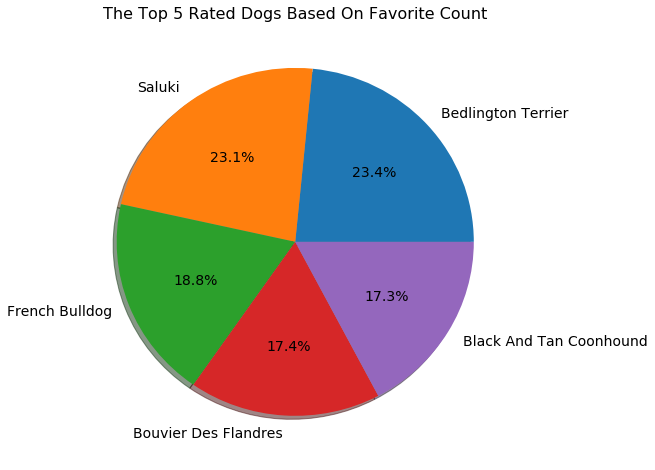

In [956]:
temp.plot(kind="pie",label="",figsize=(8,8),fontsize=14,subplots=True, shadow = True,autopct='%1.1f%%')
plt.title("The Top 5 Rated Dogs Based On Favorite Count",fontsize=16)
plt.show()

In [957]:
temp=df.copy()
temp.head(2)    

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stat,jpg_url,dog_pred,dog_prob,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461


In [958]:
temp['month'] = temp['timestamp'].dt.month
temp['year']=temp['timestamp'].dt.year

In [959]:
t17=temp[temp['year']==2017]
t17=t17.groupby('dog_pred').count()['text'].sort_values(ascending=False).head()
t17.index=['Golden Retriever', 'Labrador Retriever', 'Pembroke', 'Chihuahua',
       'French Bulldog']

In [960]:
t16=temp[temp['year']==2016]
t16=t16.groupby('dog_pred').count()['text'].sort_values(ascending=False).head()
t16.index=['Golden Retriever','Pembroke','Labrador Retriever','Chihuahua','Chow']

In [961]:
t15=temp[temp['year']==2015]
t15=t15.groupby('dog_pred').count()['text'].sort_values(ascending=False).head()
t15.index=['Chihuahua', 'Golden Retriever', 'Labrador Retriever', 'Pug',
       'Pembroke']

In [962]:
fa=t15.append(t16)
fa=fa.append(t17)

In [963]:
d=pd.DataFrame(data=fa.index)
d['values']=fa.values
d.columns=['Dog','Original']
d


,Dog,Original
0,Chihuahua,39
1,Golden Retriever,32
2,Labrador Retriever,25
3,Pug,24
4,Pembroke,20
5,Golden Retriever,82
6,Pembroke,49
7,Labrador Retriever,44
8,Chihuahua,31
9,Chow,29


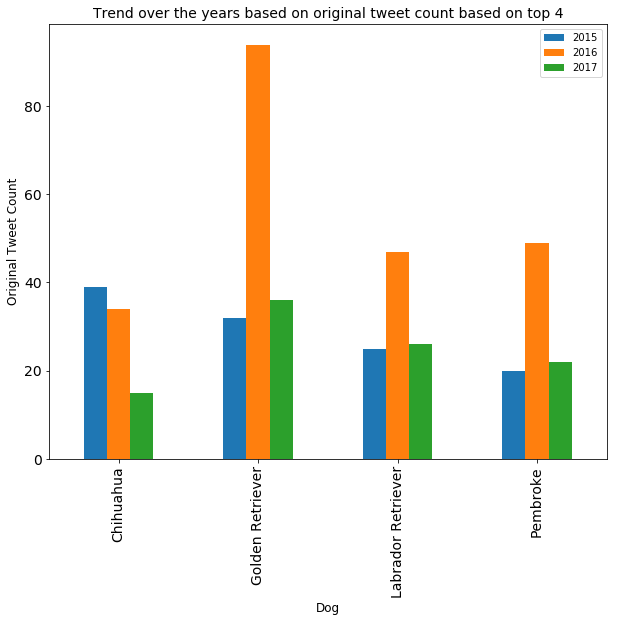

In [964]:
plotdata = pd.DataFrame({
    "2015":[39, 32, 25,20],
    "2016":[34,94, 47, 49],
    "2017":[15, 36, 26, 22]
    }, 
    index=["Chihuahua", "Golden Retriever", "Labrador Retriever", "Pembroke"]
)
plotdata.plot(kind="bar" , figsize=(10,8),fontsize=14)
plt.title("Trend over the years based on original tweet count based on top 4",fontsize=14)
plt.xlabel("Dog",fontsize=12)
plt.ylabel("Original Tweet Count",fontsize=12)
plt.show()

In [965]:
temp=df.copy()

In [966]:
temp.source.unique()

[Twitter for iPhone, Twitter Web Client, TweetDeck]
Categories (3, object): [Twitter for iPhone, Twitter Web Client, TweetDeck]

In [967]:
temp[(temp['dog_stat'].notnull()) & (temp['source']=='Twitter for iPhone')].count()[0]

251

In [968]:
temp[(temp['dog_stat'].notnull()) & (temp['source']=='Twitter Web Client')].count()[0]

1

In [969]:
temp[(temp['dog_stat'].notnull()) & (temp['source']=='TweetDeck') ].count()[0]

2

In [970]:
temp=temp[(temp['dog_stat'].notnull()) & (temp['source']=='Twitter for iPhone')]

In [971]:
#Fixing an issue
gh=temp.dog_stat.value_counts()

In [972]:
gh['doggo']=gh['doggo']+9


In [973]:
gh['pupper']=gh['pupper']+9

In [974]:
gh

pupper           172
doggo             61
puppo             21
floofer            8
doggo, pupper      7
Name: dog_stat, dtype: int64

In [975]:
gh=gh.drop(index='doggo, pupper')

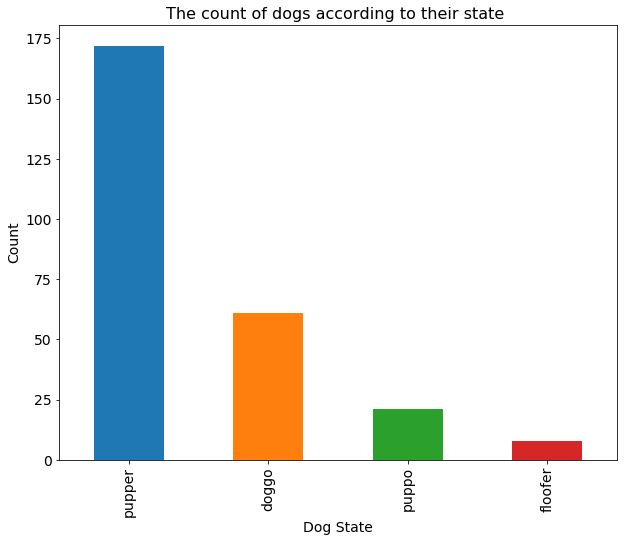

In [976]:
gh.plot(kind='bar',figsize=(10,8),fontsize=14)
plt.xlabel("Dog State",fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.title('The count of dogs according to their state ',fontsize=16)
plt.show()

In [977]:
temp=df.copy()

In [978]:
temp=temp[(temp['source']=='Twitter for iPhone')]

In [979]:
temp=temp[temp['rating_numerator']>=10]

In [980]:
temp['year']=(temp['timestamp'].dt.year).astype(str)
temp['month']=(temp['timestamp'].dt.month).astype(str)

In [981]:
temp['year_month']=temp['year']+'-'+temp['month']

In [982]:
temp=temp.sort_values(by='year_month')

In [983]:
temp=temp[['rating_numerator','year_month']]

In [984]:
temp.columns=['Rating Numerator','Year / Month']
temp=temp.groupby('Year / Month').mean()#.plot(kind='line',figsize=(10,8),fontsize=12,title="Rating Numerator Over The Years")

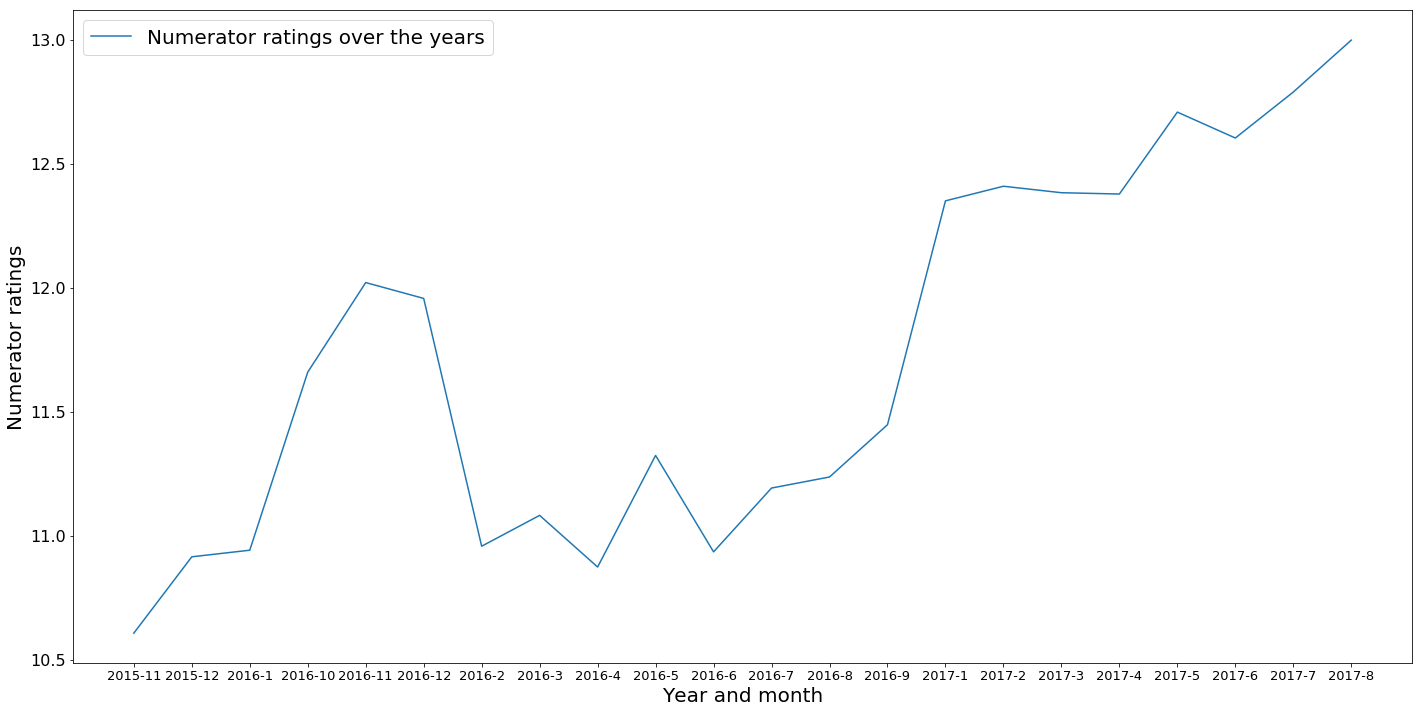

In [985]:
#plt.figure(figsize=(24,12))
fig, ax = plt.subplots(figsize=(24, 12))  
plt.plot(temp)
for label in (ax.get_yticklabels()):
    label.set_fontsize(16)
for label in (ax.get_xticklabels()):
    label.set_fontsize(13)  
ax.legend(['Numerator ratings over the years'],fontsize=20)  
plt.xlabel("Year and month",fontsize=20)
plt.ylabel("Numerator ratings",fontsize=20)
plt.show()

In [986]:
temp=df.copy()

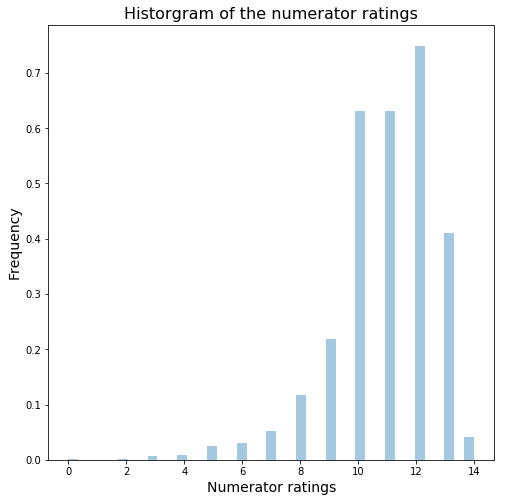

In [987]:
fig, ax = plt.subplots(figsize=(8, 8)) 
#temp.rating_numerator.hist()
#ax.legend(['Numerator ratings histogram'],fontsize=14)  
sb.distplot(temp.rating_numerator,kde=False,norm_hist=True)
plt.xlabel("Numerator ratings",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.title("Historgram of the numerator ratings",fontsize=16)
plt.show()